In [8]:
%matplotlib notebook

from gamesopt.train import train, TrainConfig
from gamesopt.games import load_game, GameOptions, QuadraticGameConfig, GameType
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.prox import ProxOptions, ProxType, ProxOptions
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
from pathlib import Path

# Compute Solution

<IPython.core.display.Javascript object>


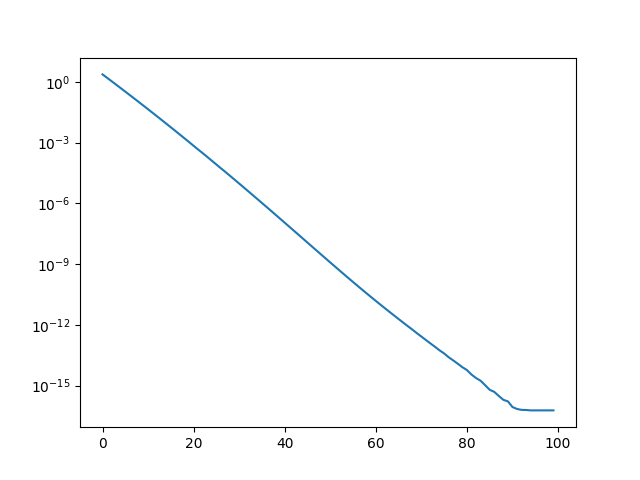

TrainConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=0.0, L=1.0, max_im=1.0), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.PROX_SGDA: 'Prox-SGDA'>, lr=lr=1.0e-02, lr_e=None, p=None, alpha=0.0, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5)), prox=ProxOptions(prox_type=<ProxType.LINF_BALL_L1_REG: 'Linf-ball+L1-reg'>, l1_reg=0.0001, ball_radius=1), num_iter=100, seed=1234, name='', save_file=PosixPath('model.pth'), load_file=None, precision=1.0)


In [9]:
prox = ProxOptions(prox_type=ProxType.LINF_BALL_L1_REG, ball_radius = 1, l1_reg = 1e-4)
config = TrainConfig(prox=prox, num_iter = 100, save_file=Path("model.pth"))
plt.figure()
plt.yscale("log")
print(config)

In [10]:
config.optimizer = OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=1e-1, full_batch=True)
record = train(config)
plt.plot(record.metrics.prox_dist)

# Results

<IPython.core.display.Javascript object>


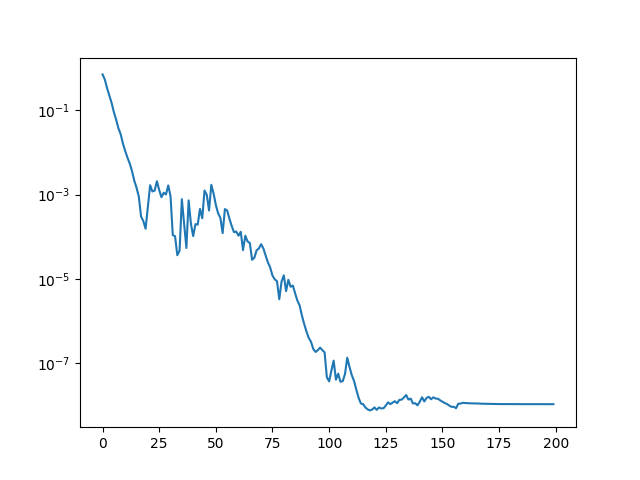

TrainConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=0.0, L=1.0, max_im=1.0), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.PROX_SGDA: 'Prox-SGDA'>, lr=lr=1.0e-02, lr_e=None, p=None, alpha=0.0, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5)), prox=ProxOptions(prox_type=<ProxType.NONE: 'none'>, l1_reg=0.01, ball_radius=1.0), num_iter=200, seed=1234, name='', save_file=None, load_file='model.pth', precision=1.0)


In [11]:
config = TrainConfig(num_iter = 200, load_file="model.pth")
plt.figure()
plt.yscale("log")
print(config)

In [12]:
config.optimizer = OptimizerOptions(optimizer_type = OptimizerType.PROX_LSVRGDA, lr=1e-1)
record = train(config)
plt.plot(record.metrics.dist2opt)

In [5]:
from gamesopt.games.quadratic_games import make_random_matrix
import torch

In [7]:
m = make_random_matrix(1, 1, 10)

In [8]:
print(m)

tensor([[[ 1.6132,  0.9624, -1.6188, -0.1760, -0.5137, -0.0746,  0.8750,
           0.9334,  0.1920,  1.6705],
         [-1.0386,  2.3110, -0.0752, -0.1743,  0.2072, -0.0475, -0.1199,
          -0.1104, -0.6492, -0.2137],
         [-0.5166,  0.2252,  0.8521,  0.4553, -0.4410, -0.4683, -0.3475,
          -1.2994,  0.4092,  0.3297],
         [-0.5097, -0.3319, -0.7448, -0.3183, -0.8646, -0.1056,  0.9849,
           0.1914,  0.9112,  1.9405],
         [ 1.9776,  0.9468,  1.3519,  1.6986,  0.0750, -0.4079,  0.8245,
           0.7873,  1.4670, -1.5838],
         [-0.4190, -0.5629,  0.2252, -0.9023, -1.1756,  0.8791, -0.7979,
          -1.0434, -0.8064,  0.4410],
         [-0.1212, -0.4227,  1.9356, -1.8066, -2.2702, -0.0889,  1.4931,
          -0.2766, -0.3859,  0.7509],
         [-0.1358, -1.6065,  0.7178,  0.1930,  0.5799,  0.0494, -0.8345,
           0.5382,  0.2485, -0.1803],
         [ 0.5417,  1.6157, -0.1074, -0.1396, -0.3249,  0.3737,  0.1044,
          -0.7351,  0.8538, -0.9742],
 

In [9]:
torch.linalg.eigvals(m)

tensor([[0.0527+3.1362j, 0.0527-3.1362j, 0.5255+2.2501j, 0.5255-2.2501j,
         2.5949+0.0000j, 0.7847+1.5131j, 0.7847-1.5131j, 0.4334+0.0000j,
         1.4126+0.0000j, 1.5701+0.0000j]])